## Atividade

Implementar um widget no Jupyter para controlar um gráfico interativamente.

In [34]:
import pandas as pd
import json
import numpy as np
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
%matplotlib inline

import ipywidgets as widgets

## Importando o .csv 

In [35]:
global df
df = pd.read_csv('tmdb_5000_movies.csv')


df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Adicionando uma coluna para guardar apenas o primeiro gênero do filme

In [36]:
df.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [37]:
df['genres'] = df['genres'].apply(lambda x : json.loads(x))

## Removendo linhas que possuem dados nulos

In [38]:
df = df.dropna()

In [39]:
df['vote_average'] = df['vote_average'].fillna(0)

In [40]:
df['genero'] = df['genres'].apply(lambda x : x[0]['name'] if x else np.nan)

In [41]:
df = df.dropna()

## Plotando o gráfico

Se o valor do parâmetro genero for igual **None** a função irá gerar um gráfico com filmes de todos os gêneros.

In [44]:
def gerar_grafico(notas_slider, genero):
    dados_grafico = pd.Series()
    
    if(genero != None):
        dr = df.groupby('genero').get_group(genero)
        
        
    
    for i, d in df.groupby('genero') if not genero else [(genero, dr)]:
        dados_grafico[i] = d[(d['vote_average'] <= notas_slider[1]) & (d['vote_average'] >= notas_slider[0])].shape[0]
    
    dados_grafico.plot(kind='barh', figsize=(20,10))
    

## Criando os Widgets (FloatRangeSlider e Dropdown)

In [53]:
generos = ['Todos'] + df['genero'].unique().tolist()

slider_porcent = widgets.FloatRangeSlider(
    value=[0, 0],
    min=0,
    max=10,
    step=0.5,
    description='Nota do Filme (%):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


drop_generos = widgets.Dropdown(
    options=generos,
    value=generos[0],
    description='Gênero :',
    disabled=False,
)

## Tratando os eventos do Widgets

In [54]:
def widget_acionado(e):
    if(isinstance(e['owner'], widgets.Dropdown)):
        clear_output(wait=True)
        
        genero = drop_generos.get_interact_value()
        
        if genero == 'Todos':
            genero = None
            
        min, max = slider_porcent.value
        notas = [min, max]
            
        gerar_grafico(notas, genero)
        display(slider_porcent)
        display(e['owner'])
        
    
    elif (isinstance(e['owner'], widgets.FloatRangeSlider)):
        if e['name'] == 'value':
            clear_output(wait=True)
            display(e['owner'])
            min, max = e['new']
            notas = [min, max]
            genero = drop_generos.get_interact_value()
            if genero == 'Todos':
                genero = None

            gerar_grafico(notas, genero)
            display(drop_generos)
            
            
slider_porcent.observe(widget_acionado)
drop_generos.observe(widget_acionado)
            

## Resultado final 

FloatRangeSlider(value=(0.0, 10.0), continuous_update=False, description='Nota do Filme (%):', max=10.0, reado…

Dropdown(description='Gênero :', options=('Todos', 'Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fic…

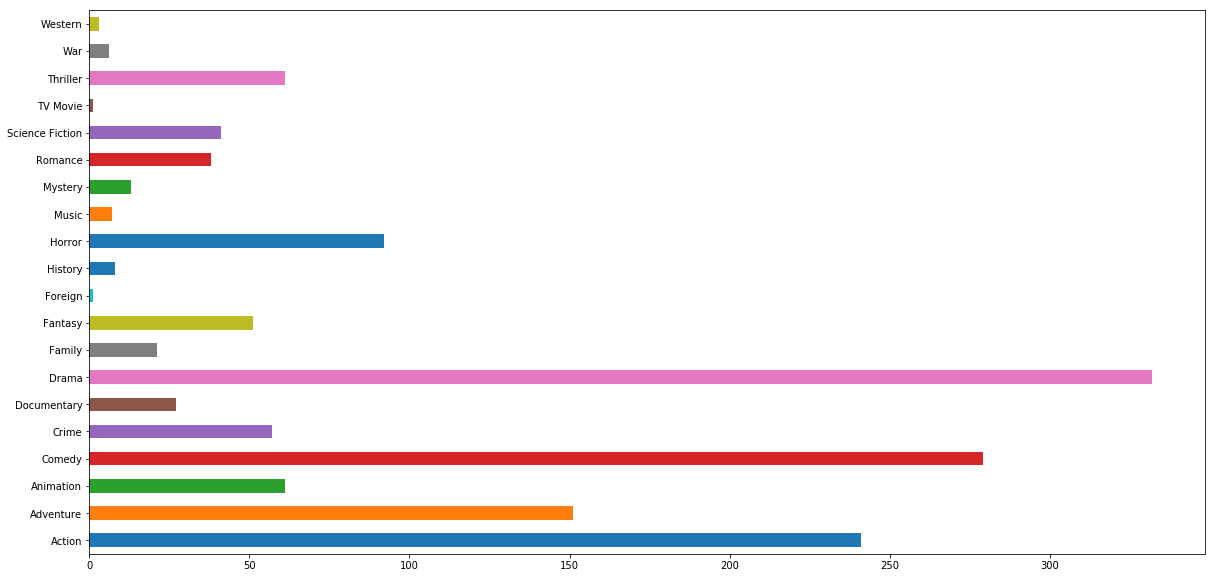

In [49]:
display(slider_porcent)
display(drop_generos)